# Contexto ✒️

Notebook destinado ao estudo de featuring engineering, junto do bootcamp ministrado pela plataforma Kaggle, do Google. Featuring Engineering se refere ao processo de transformar dados brutos em informaçõs significativas para a compreensão do que se pretende analisar, bem como prover ao modelo informações relevantes e com menor ruído por meio das quais permitem a ele ser mais preciso.

Para saber mais, consultar : https://builtin.com/articles/feature-engineering

## Bibliotecas 📚

In [71]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Dataset 💾

In [80]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/concrete.csv"

df = pd.read_csv(url)

In [81]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df.duplicated().sum()

25

In [8]:
df.shape

(1030, 9)

In [13]:
print(f'Percentual de dados duplicados em relação a todo o conjunto de dados : {round((25 / 1030), 3)*100} %')

Percentual de dados duplicados em relação a todo o conjunto de dados : 2.4 %


In [83]:
# Com base no percentual pequeno, irei excluir os dados duplicados,
# uma vez que não oferecem contribuição para a criação dos modelos
# e análise dos dados.

df = df.drop_duplicates()

In [15]:
# Verificando se ainda há dados duplicados :

df.duplicated().sum()

0

In [16]:
# Verificando as informações estatísticas dos dados :

df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Analisando a tabela estatística em relação aos dados presentes é possível compreender que nele não há a presença significativa de outliers, uma vez que apresentam valores da média e mediana próximos, com exceção das colunas slag, ash por exemplo.

Mediante a isso, farei uma análise de algumas colunas, como forma de verificar a presença de outliers por meio do gráfico de boxplot.

In [21]:
# Criando a função que gera boxplots com plotly :

def cria_boxplot(dataframe, feature):

  fig = px.box(dataframe, y=feature)
  fig.update_layout(title_text=f'Boxplot de {feature}')
  fig.update_layout(width = 800, height = 500)
  fig.update_traces(marker_color = 'green')
  fig.show()


In [25]:
cria_boxplot(df, 'cement')

In [26]:
cria_boxplot(df, 'strength')

In [22]:
cria_boxplot(df, 'slag')

In [23]:
cria_boxplot(df, 'ash')

In [24]:
cria_boxplot(df, 'age')

Ao analisar os gráficos gerados, concebe-se que a inferência anterior se mostra correta, uma vez que o dataset não apresenta como um todo a presença significativa de outliers, sendo esses destacados na coluna **age**, porém,

## Analisando o comportamento em relação à target com gráficos em barras

In [47]:
def criar_grafico_barras(dataframe, target):

  features = dataframe.columns[dataframe.columns != target]
  fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

  for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    data = dataframe.groupby(feature)[target].mean().reset_index()
    axes[row, col].bar(data[feature], data[target], width = 1)
    axes[row, col].set_title(f'{feature} vs {target}')

  plt.tight_layout()  # Ajusta o layout para evitar sobreposições
  plt.show()


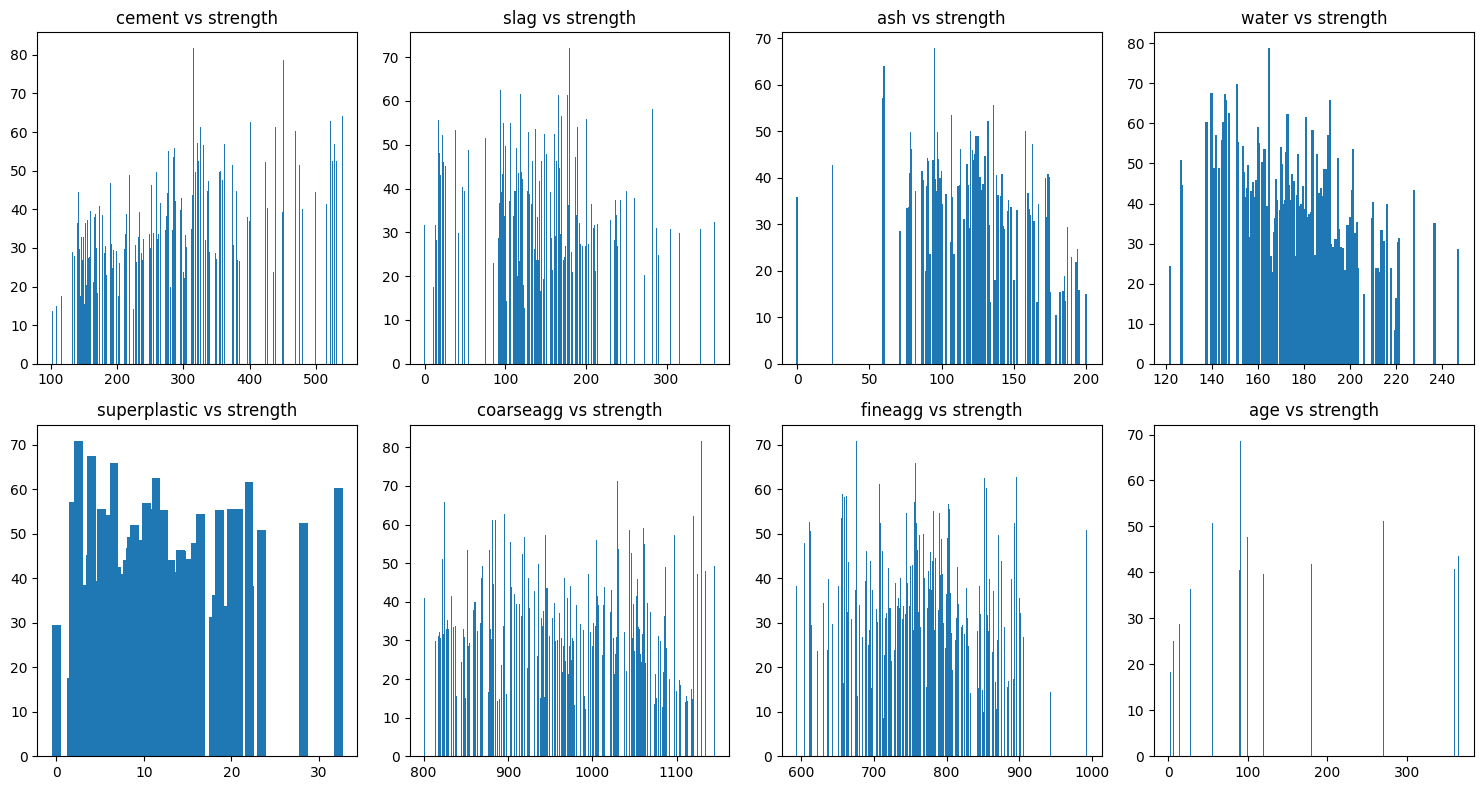

In [48]:
criar_grafico_barras(df, 'strength')

## Analisando a distribuição das features em relação à target - strenght.

In [28]:
# Selecionando as features :

features = df.columns[df.columns != 'strength']

In [29]:
features

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [31]:
# Cria a figura com 2 linhas e 4 colunas

fig = make_subplots(rows=2, cols=4, subplot_titles=features)

# Loop para criar os gráficos de dispersão

for i, feature in enumerate(features):
    row = i // 4 + 1  # Calcula a linha do gráfico
    col = i % 4 + 1   # Calcula a coluna do gráfico
    fig.add_trace(
        go.Scatter(x=df[feature], y=df['strength'], mode='markers'),
        row=row, col=col
    )

# Atualiza o layout para melhor visualização

fig.update_layout(height=600, width=1200, title_text="Relação entre Features e Strenght")
fig.show()

## Identificando o nível de correlação entre os dados

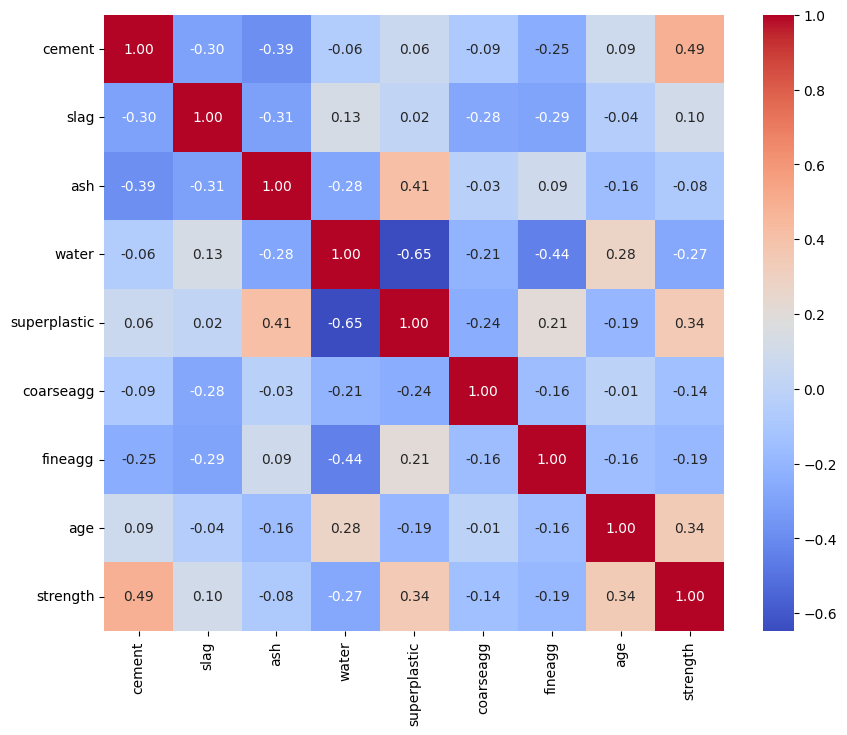

In [34]:
matrix_corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()



## Realizando o Featuring Engineering 🛠️

Nessa etapa irei realizar o feature engineering propriamente dito. No primeiro momento, irei instanciar um modelo de baseline, por meio do qual irei avaliar a sua precisão por meio do erro quadrático médio (L2), contando com todas as features presentes.

Posteriormente irei criar dois cenários, um no qual há a criação de features que reunem uma relação com outras, reduzindo a dimensionalidade dos dados e outro no qual selecionarei apenas as features mais significativas com base na matriz de correlação gerada.

 O objetivo com isso será de avaliar como se dá o desempenho do modelo em cada um desses contextos, buscando compreender a influência proporcionada da featuring engineering.

In [84]:
# Semente de reprodutibilidade.

SEED = 22

In [85]:
# Instanciando os modelos :

# Para essa tarefa irei utilizar o modelo
# de rgressão logística e XGBoost.

random_forest = RandomForestRegressor(n_estimators = 250, max_depth=10, max_features='sqrt',
                                      min_samples_leaf=10, min_samples_split=5, random_state=SEED)

xgb = XGBRegressor(n_estimators=250, max_depth=10, learning_rate=0.1, random_state=SEED)


In [94]:
from re import X
# Segmentando os dados em X e em y:

X = df.drop('strength', axis=1)
y = df['strength']

In [87]:
# Realizando o holdout :

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=SEED)

In [88]:
# Criando uma função que avalia os modelos :

def avalia_modelos(nome_modelo, modelo):

  modelo.fit(X_train, y_train)

  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)

  print(f'\n Modelo {nome_modelo} \n')
  print(f'Erro quadrático médio : {round(mse, 2)}')

In [89]:
modelos = [
    ( 'Random Forest', random_forest),
    ( 'XGBoost', xgb)
]

for nome_modelo, modelo in modelos :
  avalia_modelos(nome_modelo, modelo)


 Modelo Random Forest 

Erro quadrático médio : 56.85

 Modelo XGBoost 

Erro quadrático médio : 22.67


## Criando novas features

In [95]:
# Criando novas features sintéticas

X["FCRatio"] = X["fineagg"] / X["coarseagg"]
X["AggCmtRatio"] = (X["coarseagg"] + X["fineagg"]) / X["cement"]
X["WtrCmtRatio"] = X["water"] / X["cement"]

In [96]:
X = X.drop(['fineagg', 'coarseagg', 'superplastic',
            'water', 'ash', 'slag', 'cement'], axis=1)

In [98]:
X = X.drop(['age'], axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=SEED)

In [100]:
# Criando uma função que avalia os modelos :

def avalia_modelos(nome_modelo, modelo):

  modelo.fit(X_train, y_train)

  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)

  print(f'\n Modelo {nome_modelo} \n')
  print(f'Erro quadrático médio : {round(mse, 2)}')

In [101]:
modelos = [
    ( 'Random Forest', random_forest),
    ( 'XGBoost', xgb)
]

for nome_modelo, modelo in modelos :
  avalia_modelos(nome_modelo, modelo)


 Modelo Random Forest 

Erro quadrático médio : 172.31

 Modelo XGBoost 

Erro quadrático médio : 184.86


Parece que criando features sintetizadas com base na relação das anteriores, por mais que tenha reduzido a dimensionalidade dos dados, apresentou uma significativa piora frente a abordagem anterior, no atual contexto.

## Selecionando as features relevantes

In [102]:
X = df.drop(['strength', 'ash', 'slag'], axis=1)
y = df['strength']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=SEED)

In [104]:
# Criando uma função que avalia os modelos :

def avalia_modelos(nome_modelo, modelo):

  modelo.fit(X_train, y_train)

  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)

  print(f'\n Modelo {nome_modelo} \n')
  print(f'Erro quadrático médio : {round(mse, 2)}')

In [105]:
modelos = [
    ( 'Random Forest', random_forest),
    ( 'XGBoost', xgb)
]

for nome_modelo, modelo in modelos :
  avalia_modelos(nome_modelo, modelo)


 Modelo Random Forest 

Erro quadrático médio : 59.24

 Modelo XGBoost 

Erro quadrático médio : 27.35
